We begin by importing our data and taking a look at the column names

In [4]:
import pandas as pd
import numpy as np
cars = pd.read_csv('cars_cleaned.csv')
cars.columns

Index(['condition', 'drive', 'fuel', 'location', 'odometer', 'paint color',
       'price', 'sale type', 'title status', 'transmission', 'type',
       'cylinders', 'size', 'latitude', 'longitude', 'location_simple', 'year',
       'age', 'make_', 'model', 'pos_words', 'neg_words', 'low_text', 'model0',
       'model1', 'model2'],
      dtype='object')

In [5]:
#look at the first few lines of data
cars.head()

,condition,drive,fuel,location,odometer,paint color,price,sale type,title status,transmission,...,year,age,make_,model,pos_words,neg_words,low_text,model0,model1,model2
0,good,4wd,gas,vancouver,281000,white,5500,owner,rebuilt,automatic,...,2007,14,bmw,x3,False,False,False,x3,None,None
1,unknown,fwd,gas,vancouver,140000,unknown,600,owner,clean,automatic,...,1984,37,honda,accord,False,False,False,accord,None,None
2,excellent,rwd,diesel,vancouver,110000,white,67000,owner,clean,automatic,...,2008,13,gmc,c7500,False,False,False,c7500,None,None
3,unknown,fwd,gas,vancouver,243000,unknown,4000,owner,clean,automatic,...,2003,18,acura,rsx,True,False,False,rsx,None,None
4,salvage,fwd,gas,vancouver,225000,black,1500,owner,salvage,automatic,...,2005,16,acura,rsx,False,False,False,rsx,None,None


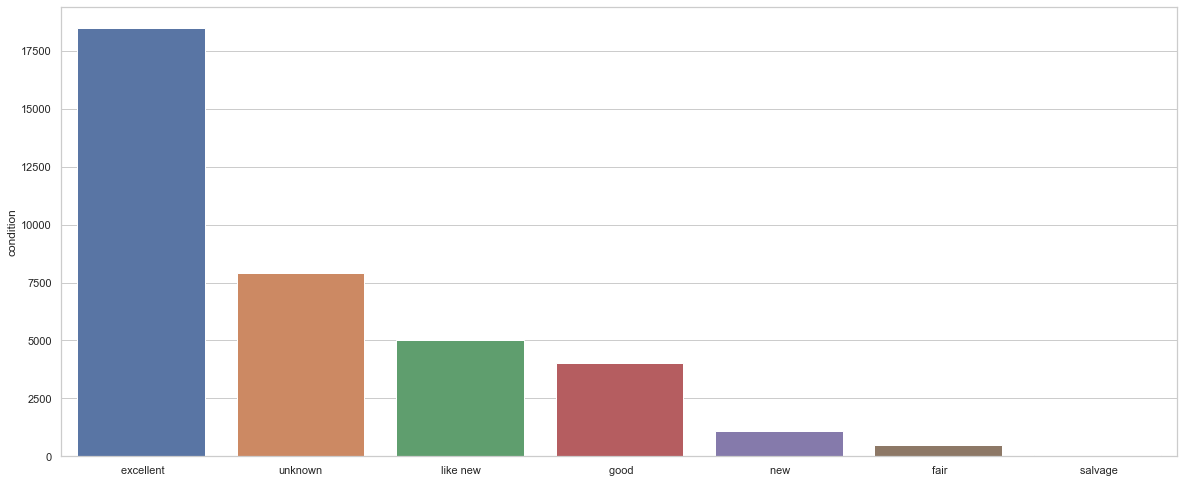

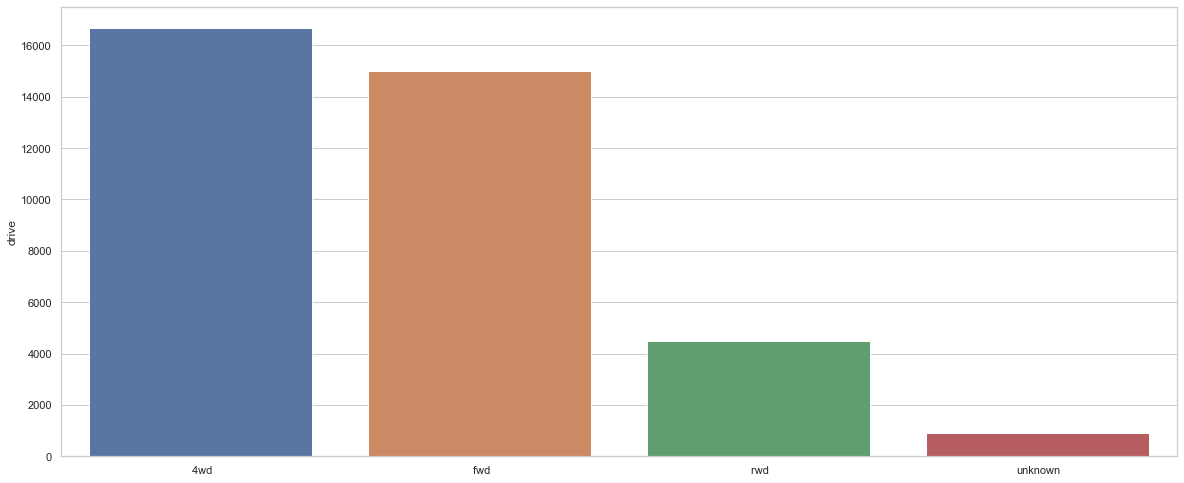

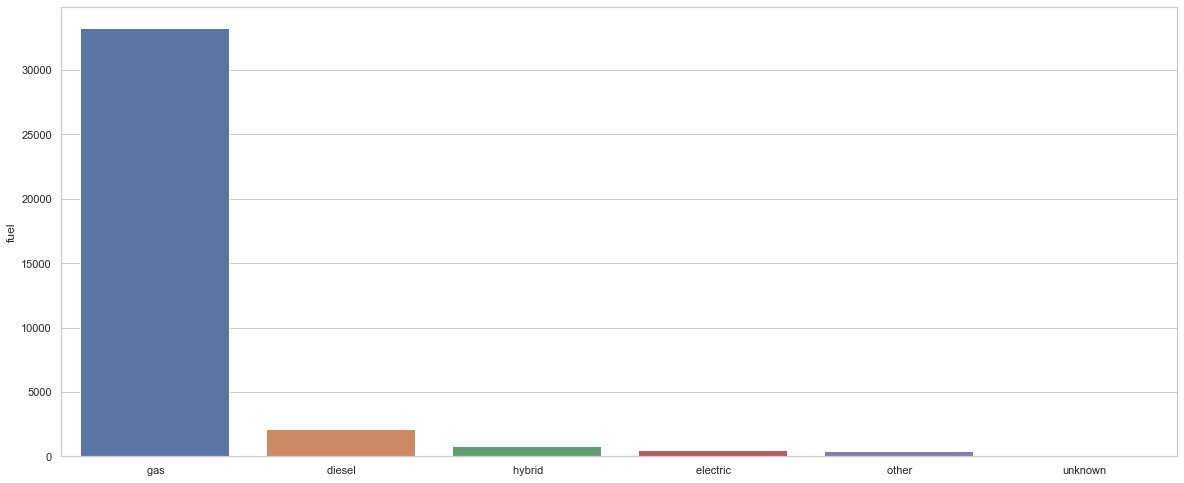

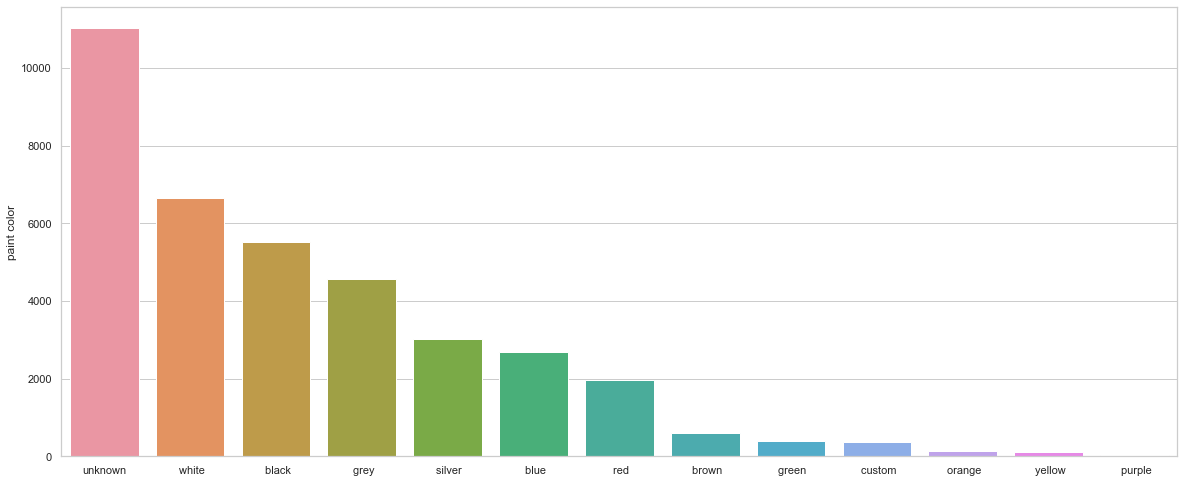

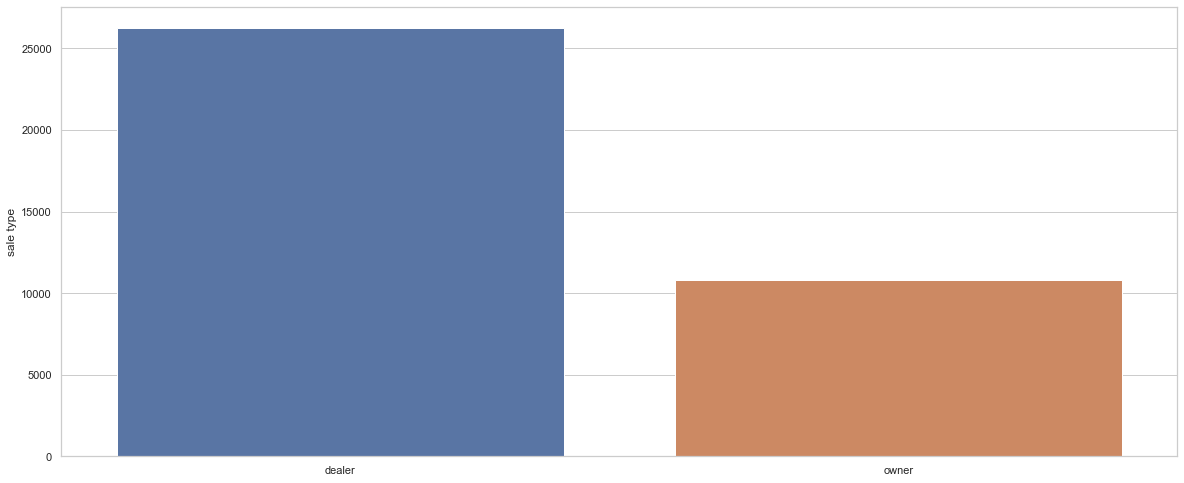

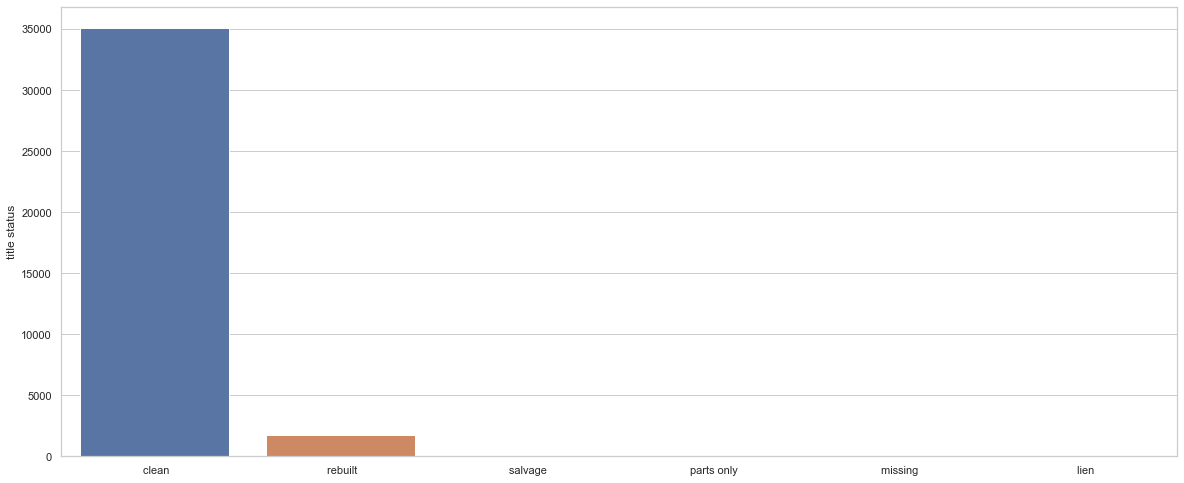

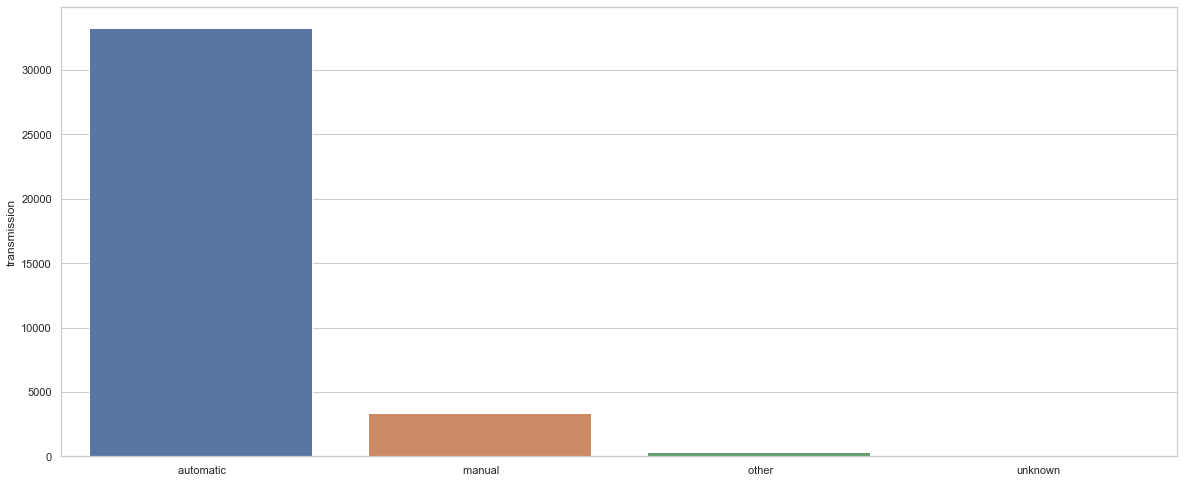

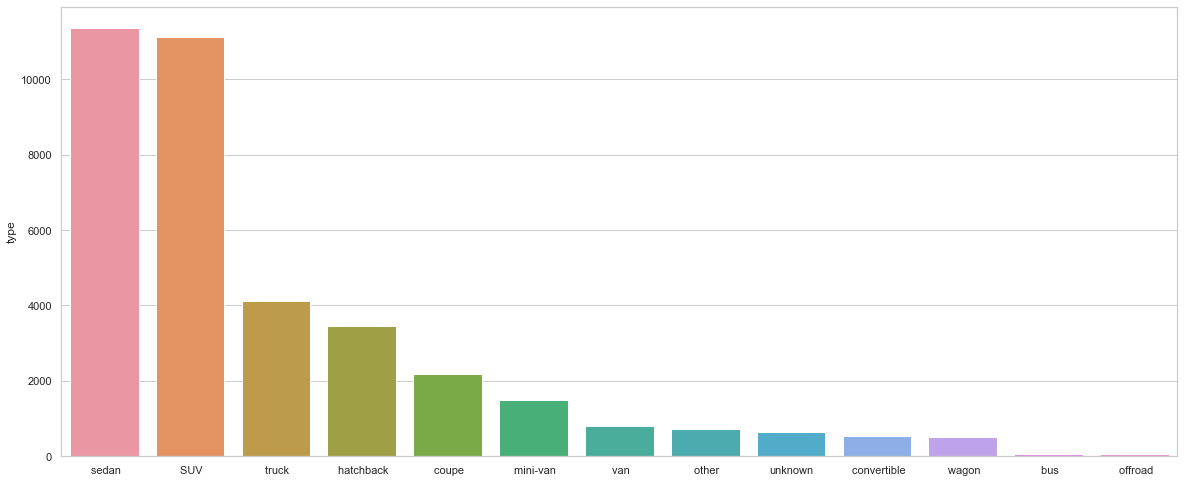

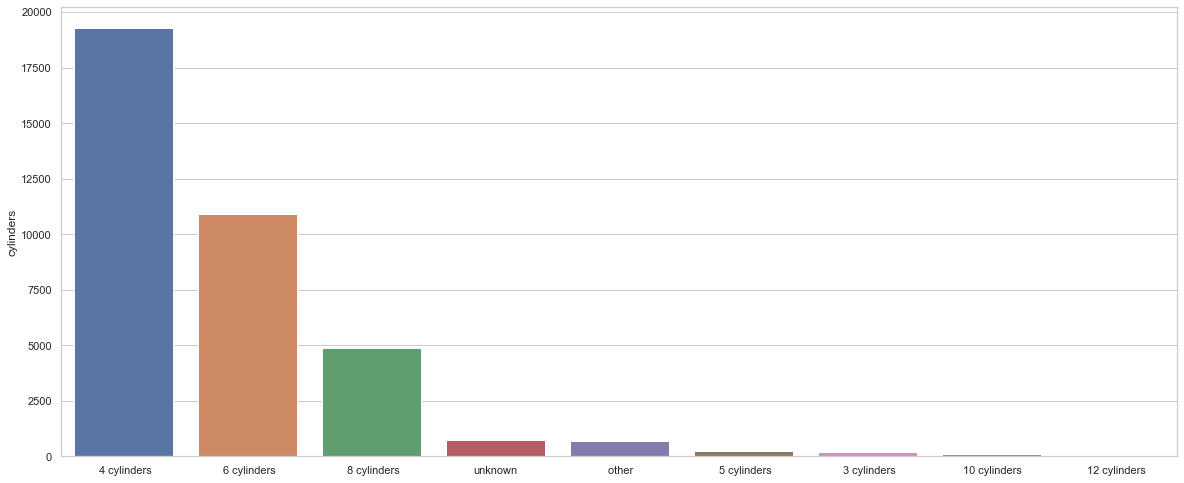

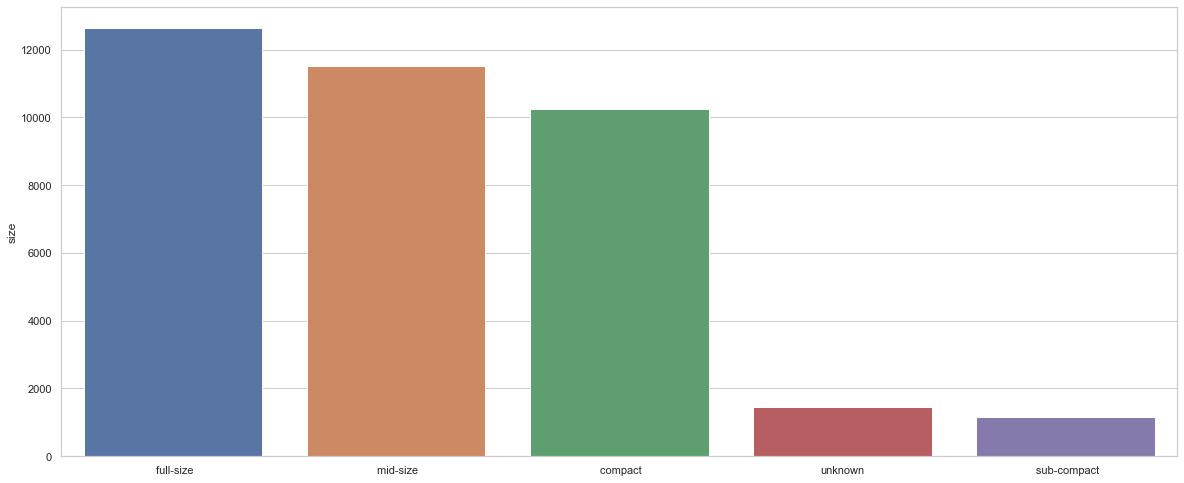

In [131]:
#Plot histograms of some of the indicator variables to better understand the distribution of data.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

for col in ['condition', 'drive', 'fuel', 'paint color', 'sale type', 'title status', 'transmission', 'type', 
            'cylinders', 'size']:
    dat = cars[col].value_counts()
    sns.barplot(x = dat.index, y = dat)
    plt.show()

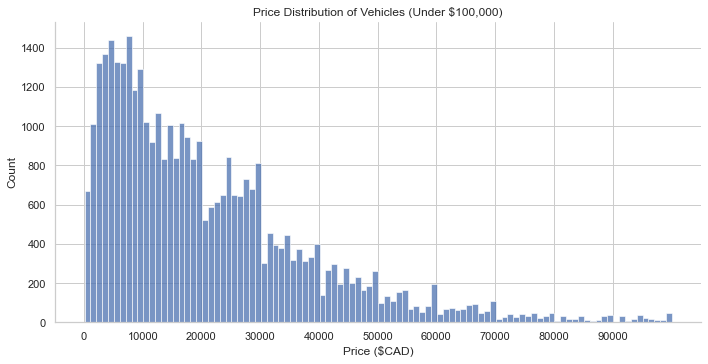

In [130]:
#plot price histogram
cars = cars[cars.price<1e5]

sns.displot(cars, x='price', binwidth=1000, height=5, aspect=2)#, bw_adjust=0.4)
plt.xticks(range(0,int(1e5), int(1e4)))
plt.xlabel('Price ($CAD)')
plt.title('Price Distribution of Vehicles (Under $100,000)')
plt.show()

Price distribution for all of the vehichles. The overall distribution is skewed right, with the most common price being between $3,000-$8,000.

Note the dips in price at multiples of $10,000. This indicates a psychological pricing strategy (eg.  asking $19,000 instead of $20,000 in hopes that the price will seem lower than it actually is).

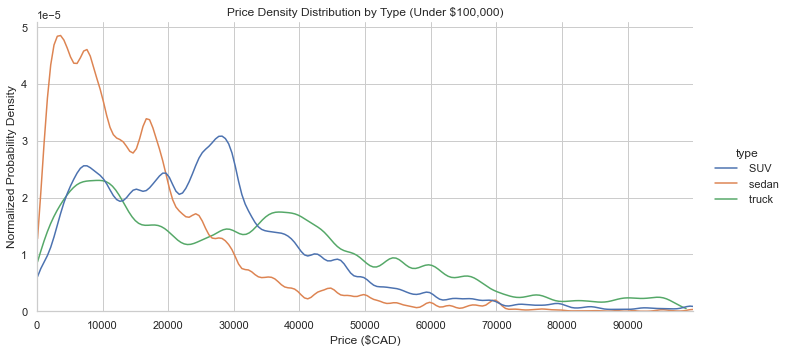

In [135]:
#plot pricing probability density for different types of vehicle
cars_plt = cars[cars.type.isin([' sedan', ' SUV', ' truck'])]
sns.displot(cars_plt, x='price', hue='type', kind='kde', bw_adjust=0.4, cut=0, common_norm=False, height=5, aspect=2)#, bw_adjust=0.4)
plt.xticks(range(0,int(1e5), int(1e4)))
plt.xlabel('Price ($CAD)')
plt.xlim(0,int(1e5))
plt.ylabel('Normalized Probability Density')
plt.title('Price Density Distribution by Type (Under $100,000)')
plt.show()

Probability density of price for sedans, SUVs, and Trucks. The curves hve been noramlized so the area under each curve is 1. Sedans are the most skewed to the low price end. SUVs and trucks have lower end options (under \\$10,000) but are also commonly found in the \\$30,000-\\$40,000 range. The psychological strategy of pricing just under multiples of \\$10,000 is more apparent here. This might be a good strategy on Craigslist as potential buyers might tend to use the pricing filter on their search with a bands at a round number.

Another interesting feature is the dip in trucks between \\$15,000 and \\$30,000, this may indicate there is less turnover in trucks for this price. Perhaps this means people are happy with their trucks in this range, so if you find one it could be a good buy.

In [187]:
#take a look at the mean year and odometer for trucks in this range
cars[(cars.type==' truck') & (15000<cars.price) & (cars.price<30000)].mean()[['odometer', 'year']]

odometer    171990.991696
year          2010.563464
dtype: float64

It appears that a 2010 truck with 170,000km for might be a good buy if someone is willing to part with it.

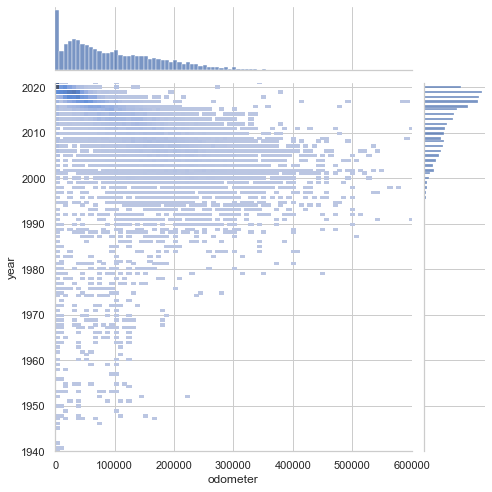

In [279]:
#plot distribution of vehicles over odometer reading and year
cars = cars[cars.odometer<1e6]

g = sns.JointGrid(data=cars, x='odometer', y='year', height = 7, xlim = (0, 6e5), ylim=(1940, 2021))
g.plot_joint(sns.histplot)
g.plot_marginals(sns.histplot)
plt.show()

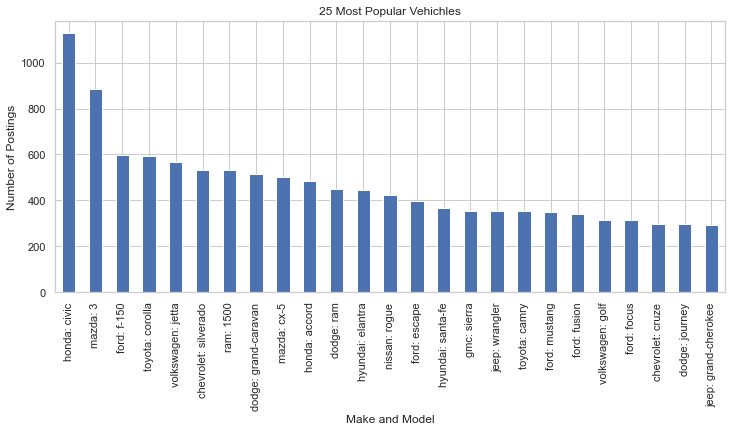

In [337]:
#column with the make and model in one (for plotting)
cars['make_model0'] = cars['make_'] + ': ' + cars['model0']
#plot 20 most popular cars
com_cars = cars.make_model0.value_counts()[:25]
fig = com_cars.plot.bar(figsize=(12,5))
plt.xlabel('Make and Model')
plt.ylabel('Number of Postings')
plt.title('25 Most Popular Vehichles')
plt.show()

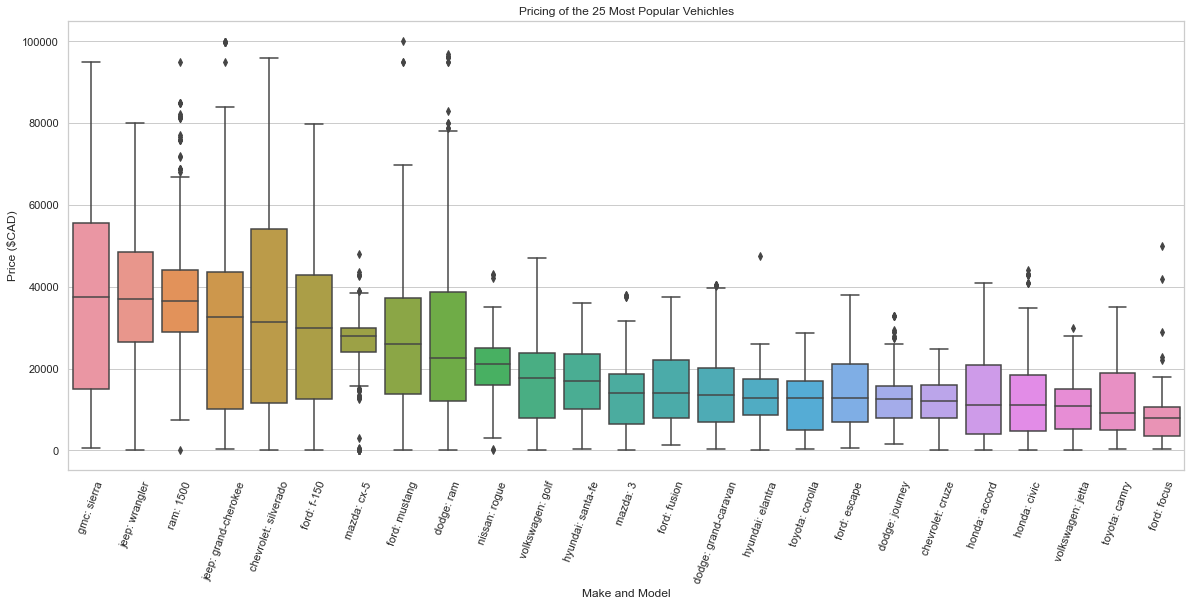

In [334]:
#plot the average prices of the 25 most popular cars
com_price = cars.loc[cars.make_model0.isin(com_cars.index)]#.median().sort_values(ascending=False)
ordered_labels = com_price.groupby('make_model0').price.median().sort_values(ascending=False).index.values

sns.boxplot(data=com_price, x="make_model0", y="price", order=ordered_labels)
plt.xticks(rotation = 70)

plt.xlabel('Make and Model')
plt.ylabel('Price ($CAD)')
plt.title('Pricing of the 25 Most Popular Vehichles')
plt.show()

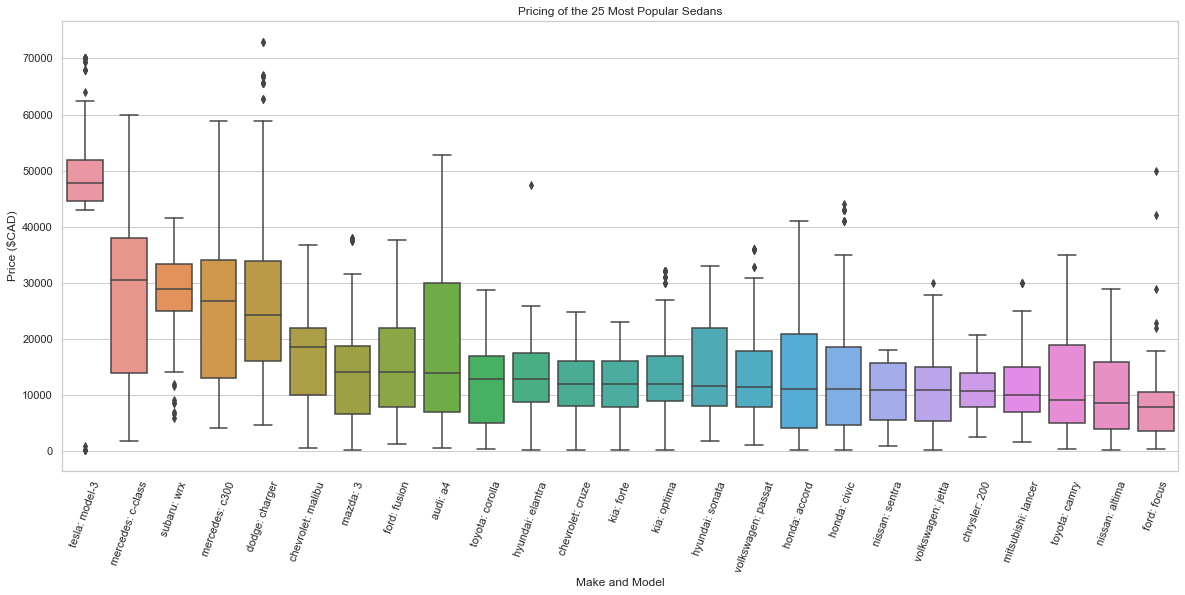

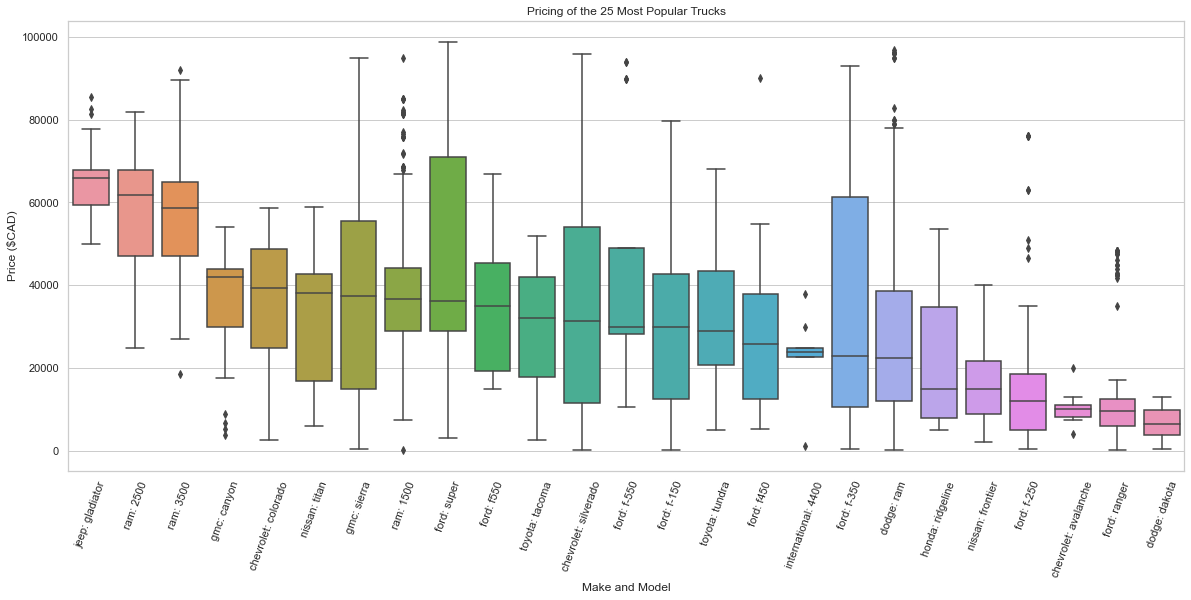

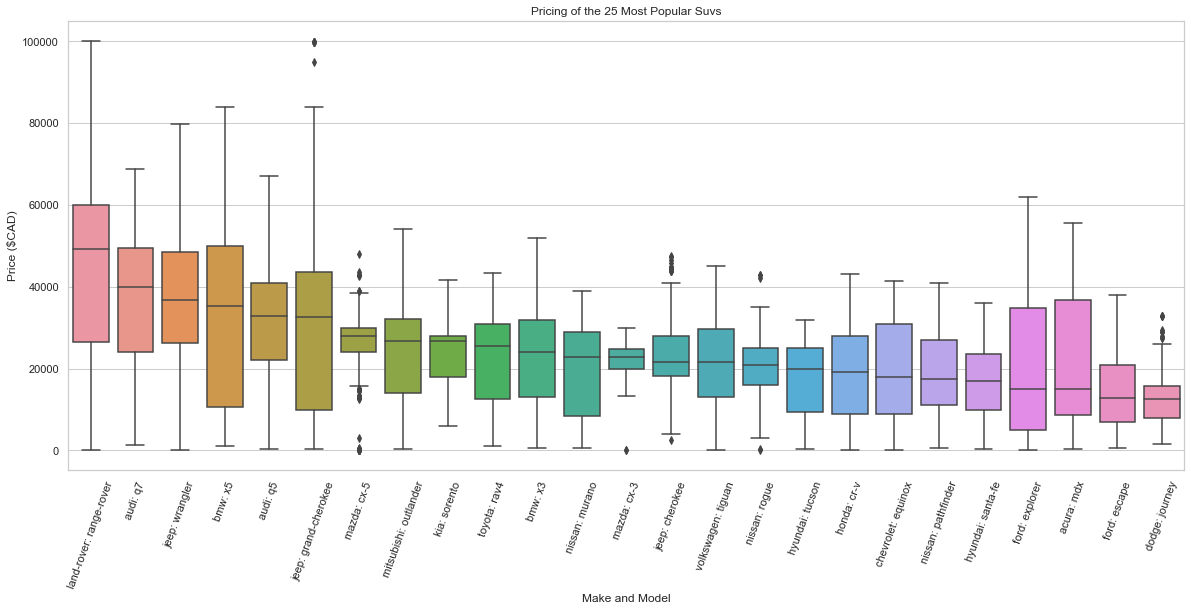

In [347]:
#plot the average prices of the 25 most popular trucks, trucks, and SUVS

for thing in [' sedan', ' truck', ' SUV']:
    com = cars[cars['type']==thing].make_model0.value_counts()[0:25].index
    com_price = cars.loc[cars.make_model0.isin(com)]
    ordered_labels = com_price.groupby('make_model0').price.median().sort_values(ascending=False).index.values

    sns.boxplot(data=com_price, x="make_model0", y="price", order=ordered_labels)
    plt.xticks(rotation = 70)

    plt.xlabel('Make and Model')
    plt.ylabel('Price ($CAD)')
    plt.title('Pricing of the 25 Most Popular {}s'.format(thing[1:].capitalize()))
    plt.show()

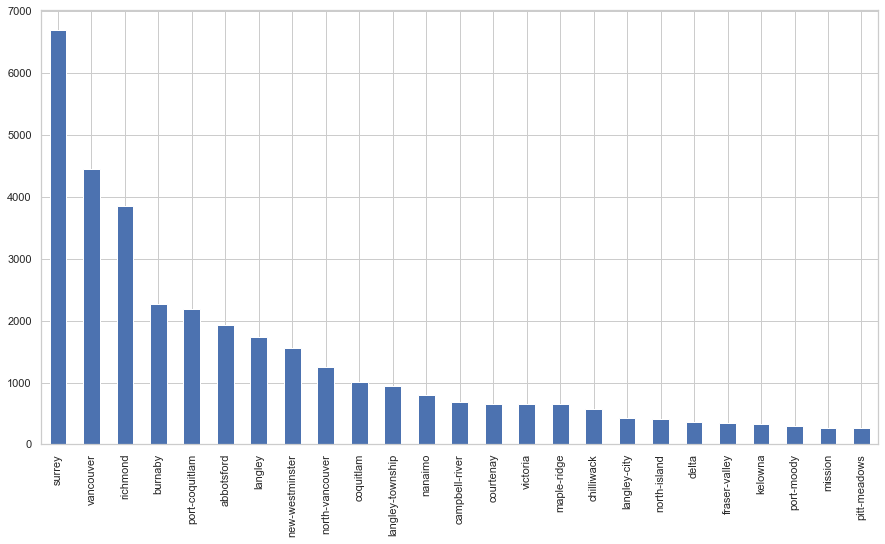

In [296]:
fig = cars.location_simple.value_counts()[0:25].plot.bar(figsize=(15,8))
plt.show()

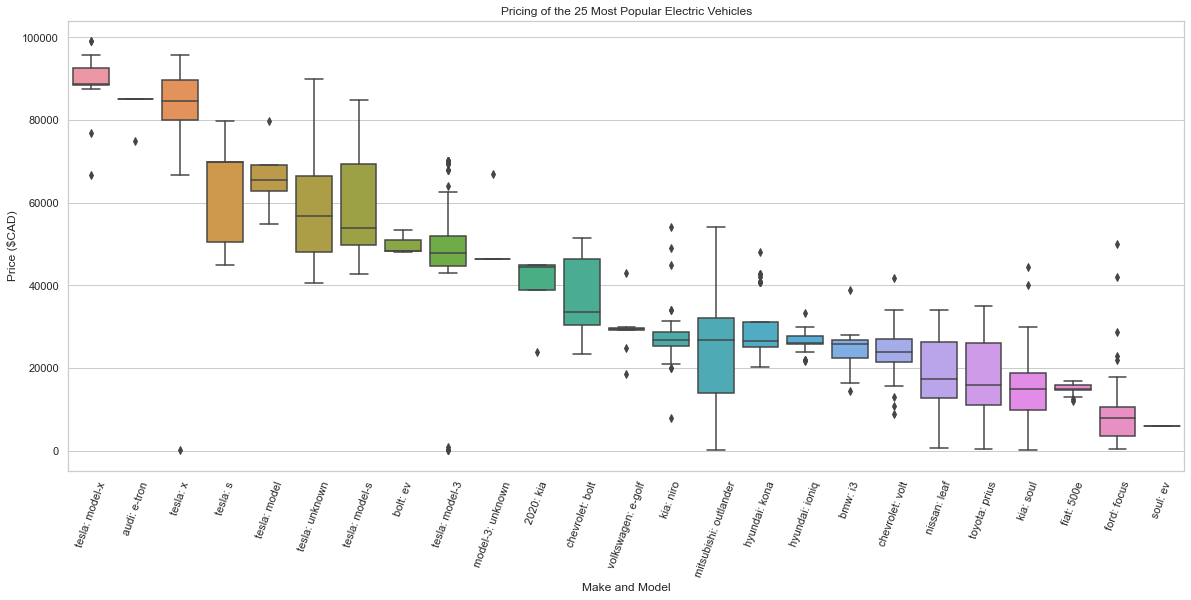

In [348]:
com = cars[cars['fuel']==' electric'].make_model0.value_counts()[0:25].index
com_price = cars.loc[cars.make_model0.isin(com)]
ordered_labels = com_price.groupby('make_model0').price.median().sort_values(ascending=False).index.values

sns.boxplot(data=com_price, x="make_model0", y="price", order=ordered_labels)
plt.xticks(rotation = 70)

plt.xlabel('Make and Model')
plt.ylabel('Price ($CAD)')
plt.title('Pricing of the 25 Most Popular Electric Vehicles')
plt.show()

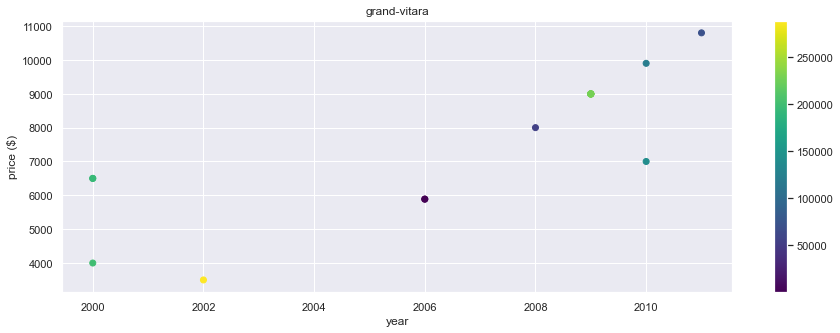

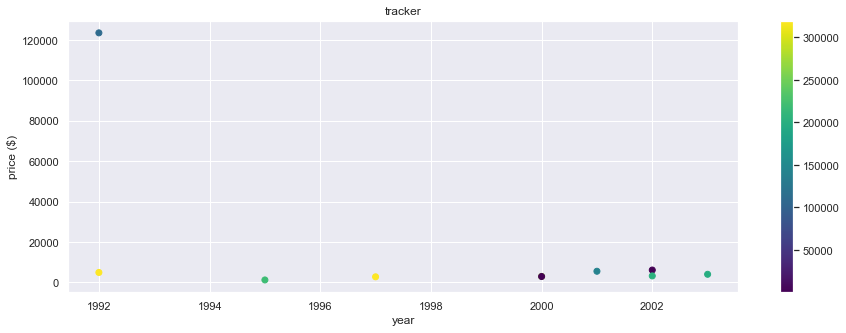

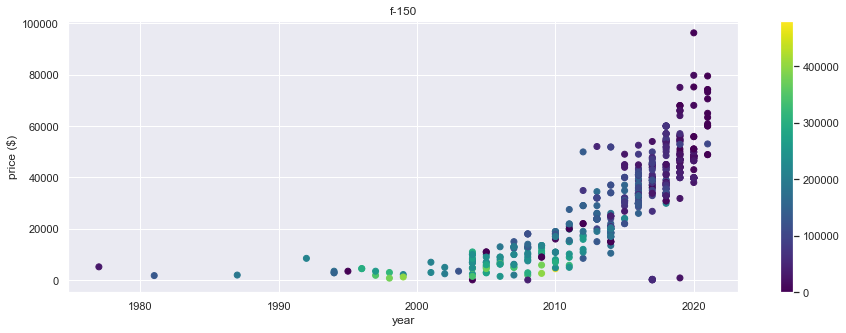

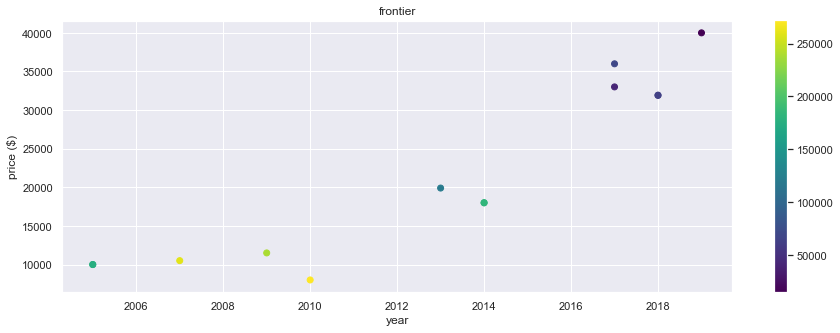

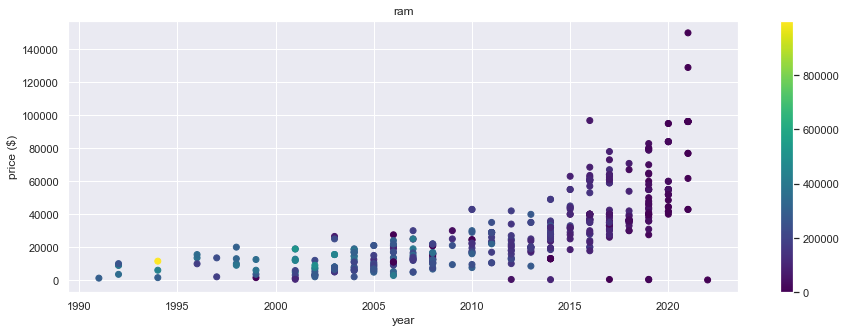

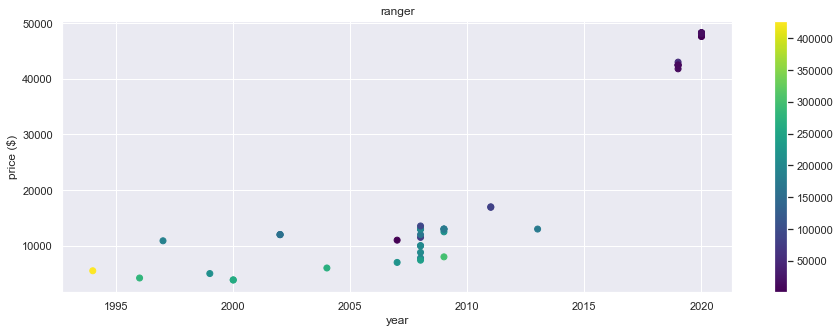

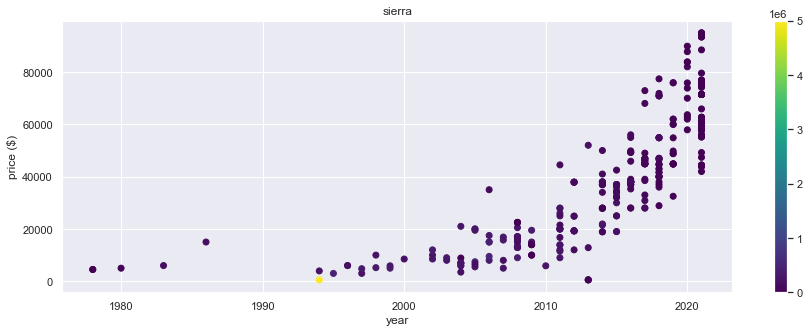

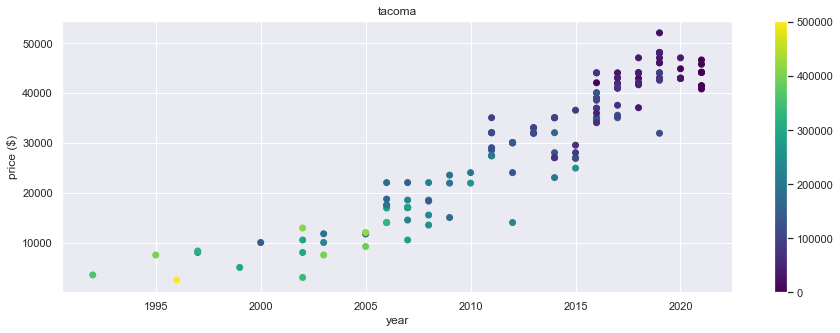

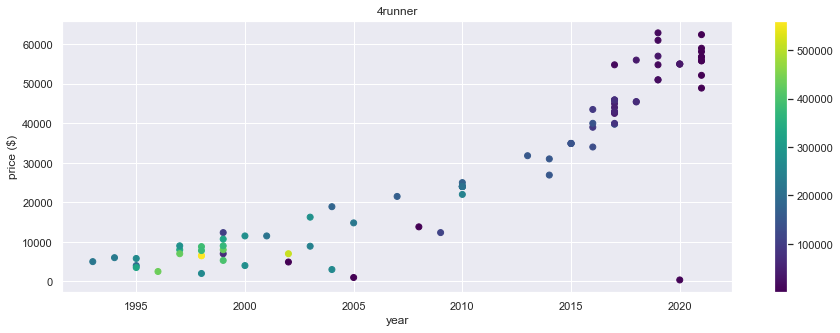

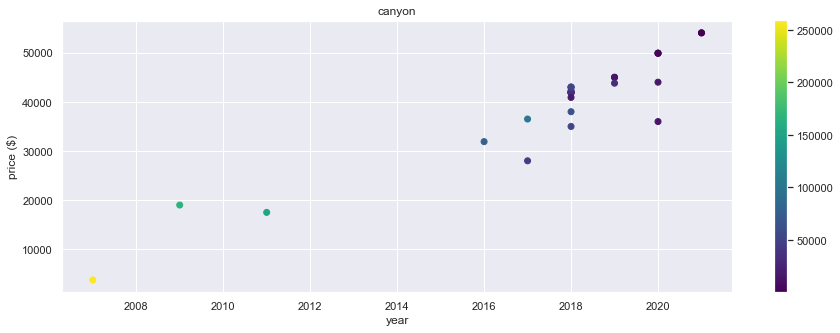

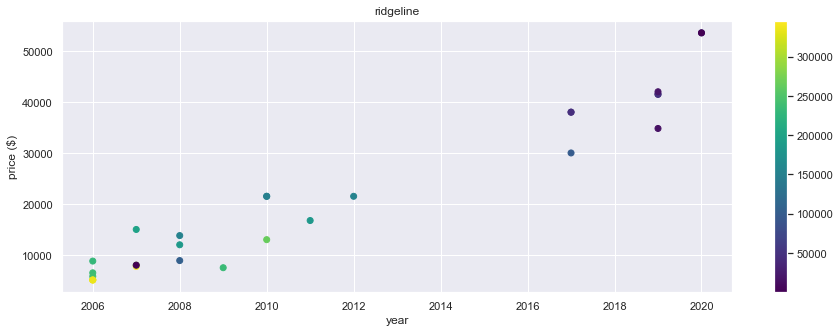

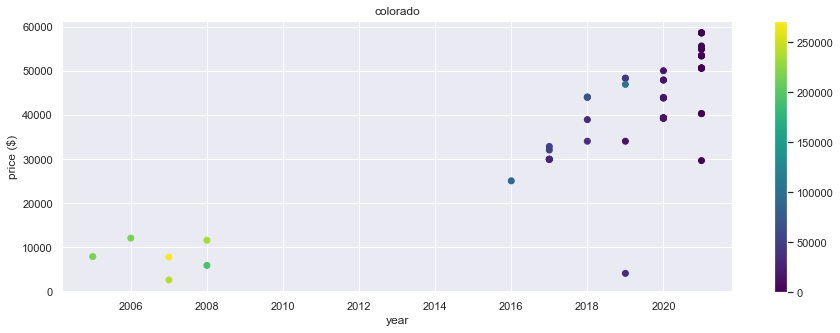

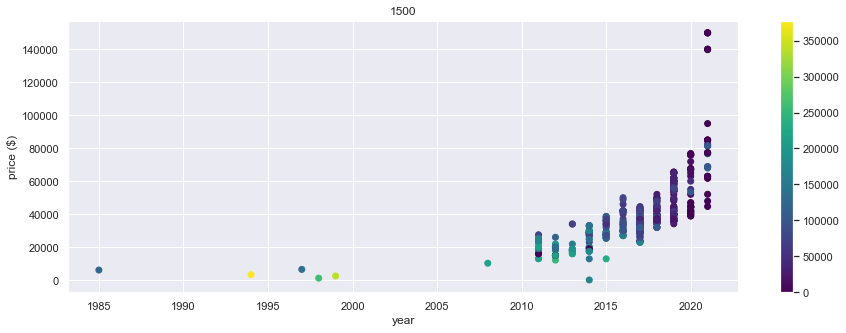

In [183]:
names = ['grand-vitara', 'tracker',  'f-150', 'frontier', 'ram', 'ranger', 'sierra', 'tacoma', '4runner', 'canyon', 'ridgeline', 'colorado', '1500']
for name in names:
    df = cars[(cars['model0']==name) & (cars['drive']==' 4wd')]
    trucks = plt.scatter(x = df['year'], y = df['price'], c=df['odometer'], cmap='viridis')
    plt.colorbar(trucks)
    plt.xlabel('year')
    plt.ylabel('price ($)')
    plt.title(name)
    plt.show()

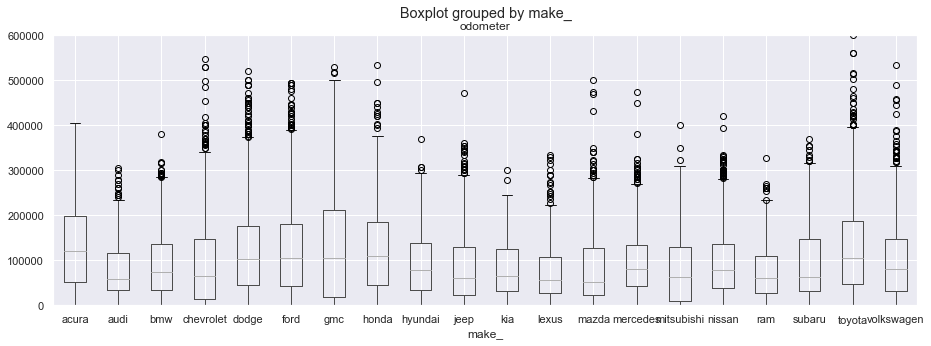

In [199]:
#boxplot odometer vs make
pop_makes = cars['make_'].value_counts()[:20].index.values
cars[cars['make_'].isin(pop_makes)].boxplot(column='odometer', by='make_')
plt.ylim(0, 600000)
plt.show()

In [215]:
#map with price heatmap
#price vs year (reference https://www.kaggle.com/paulinan/usa-used-cars-market-analysis)
import geopandas as gpd


In [203]:
def get_missing_info(df):
    num_entries = df.shape[0]*df.shape[1]
    null_entries = df.isnull().sum().sum()
    percent_empty = null_entries/num_entries*100
    num_missing = df.isna().sum()
    percent_missing = num_missing/len(df)*100
    col_modes = df.mode().loc[0]
    percent_mode = [df[x].isin([df[x].mode()[0]]).sum()/len(df)*100 for x in df]
    missing_value_df = pd.DataFrame({'num_missing': num_missing,
                                     'percent_missing': percent_missing, 
                                     'mode': col_modes,
                                     'percent_mode':percent_mode})
    print('total empty percent:', percent_empty, '%')
    print('columns that are more than 97% mode:', missing_value_df.loc[missing_value_df['percent_mode']>97].index.values)
    return(missing_value_df)
get_missing_info(cars)

total empty percent: 0.007004056172530504 %
columns that are more than 97% mode: []


,num_missing,percent_missing,mode,percent_mode
condition,0,0.000000,excellent,49.712113
drive,0,0.000000,4wd,45.041643
fuel,0,0.000000,gas,89.673549
location,0,0.000000,surrey,9.978308
odometer,0,0.000000,1,1.813021
paint color,0,0.000000,unknown,29.790311
price,0,0.000000,3500,0.779304
sale type,0,0.000000,dealer,70.855092
title status,0,0.000000,clean,94.694839
transmission,0,0.000000,automatic,89.724432
